### 0. Importación de librerías y carga de datos

In [12]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# q-q plots
import scipy.stats as stats

# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

In [13]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook

pais, liga = "belgica", "jupiler-pro-league"
#pais, liga = "espana", "laliga"
#pais, liga = "espana", "laliga-smartbank"
#pais, liga = "francia", "ligue-1"
#pais, liga = "francia", "ligue-2"
#pais, liga = "inglaterra", "championship"
#pais, liga = "inglaterra", "premier-league"
#pais, liga = "italia", "serie-a"
#pais, liga = "italia", "serie-b"
#pais, liga = "paises-bajos", "eredivisie"
#pais, liga = "portugal", "liga-portugal"
#pais, liga = "turquia", "super-lig"
#pais, liga = "colombia", "primera-a"
#pais, liga = "brasil", "brasileirao-serie-a"

version = 1

import pandas as pd
import glob

# Specify the path to the directory containing your Excel files
excel_files_path = f'../data/2023-24/version{version}/anteriores/*.xlsx'

# Get a list of all Excel files in the specified directory
excel_files = glob.glob(excel_files_path)

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each Excel file and read it into a DataFrame
for excel_file in excel_files:
    df = pd.read_excel(excel_file)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

# Print the combined DataFrame
print(data)

                  Date     HomeTeam         AwayTeam  HG  AG   HxG   AxG  HP  \
0     27.12.2023 12:30    St. Lieja      St. Truiden   1   1  0.27  1.02  48   
1     26.12.2023 14:45  Club Brujas  Royale Union SG   1   1  1.71  0.83  60   
2     26.12.2023 12:30     Westerlo             RWDM   3   0  1.97  0.98  49   
3     26.12.2023 10:00     Kortrijk             Gent   0   2  0.54  2.10  30   
4     26.12.2023 10:00       Leuven            Eupen   3   0  1.83  0.98  47   
...                ...          ...              ...  ..  ..   ...   ...  ..   
1112  13.08.2023 09:30      Rio Ave           Chaves   2   0  3.53  0.26  69   
1113  12.08.2023 14:30  Sporting CP           Vizela   3   2  1.61  0.26  59   
1114  12.08.2023 12:00      Farense         Casa Pia   0   3   NaN   NaN  46   
1115  12.08.2023 09:30  Gil Vicente     Portimonense   5   0  1.17  0.65  58   
1116  11.08.2023 14:15     SC Braga        Famalicao   1   2  0.89  0.59  59   

      AP  HTS  ...     AA    HDA   ADA 

### 1. Entendimiento de los datos

In [14]:
# Se revisa la forma general de los datos cargados
data.shape

(1117, 50)

In [15]:
# Se muestra una pequeña muestra de los datos
data.head()

,Date,HomeTeam,AwayTeam,HG,AG,HxG,AxG,HP,AP,HTS,...,AA,HDA,ADA,HClC,AClC,HCrC,ACrC,HDC,ADC,Resultado
0,27.12.2023 12:30,St. Lieja,St. Truiden,1,1,0.27,1.02,48,52,11,...,100.0,44.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,26.12.2023 14:45,Club Brujas,Royale Union SG,1,1,1.71,0.83,60,40,9,...,108.0,54.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,26.12.2023 12:30,Westerlo,RWDM,3,0,1.97,0.98,49,51,13,...,68.0,52.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,3
3,26.12.2023 10:00,Kortrijk,Gent,0,2,0.54,2.10,30,70,7,...,148.0,31.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,-2
4,26.12.2023 10:00,Leuven,Eupen,3,0,1.83,0.98,47,53,18,...,76.0,55.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,3


In [16]:
# Se imprimen los diferentes tipos de las columnas. Todas son numéricas
data.dtypes

Date          object
HomeTeam      object
AwayTeam      object
HG             int64
AG             int64
HxG          float64
AxG          float64
HP             int64
AP             int64
HTS            int64
ATS            int64
HSI            int64
ASI            int64
HSO            int64
ASO            int64
HBS          float64
ABS          float64
HFK          float64
AFK          float64
HC             int64
AC             int64
HOFF           int64
AOFF           int64
HTI          float64
ATI          float64
HGS            int64
AGS            int64
HF             int64
AF             int64
HRC            int64
ARC            int64
HYC          float64
AYC          float64
HTP          float64
ATP          float64
HPC          float64
APC          float64
HT           float64
AT           float64
HA           float64
AA           float64
HDA          float64
ADA          float64
HClC         float64
AClC         float64
HCrC         float64
ACrC         float64
HDC          

In [17]:
# Se hace una decripción de los datos
data.describe()

,HG,AG,HxG,AxG,HP,AP,HTS,ATS,HSI,ASI,...,AA,HDA,ADA,HClC,AClC,HCrC,ACrC,HDC,ADC,Resultado
count,1117.000000,1117.000000,1040.000000,1040.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,...,1116.000000,1116.000000,1116.000000,154.000000,154.000000,98.000000,98.000000,50.000000,50.000000,1117.000000
mean,1.582811,1.241719,1.447077,1.129452,51.274843,48.725157,14.249776,11.651746,5.011638,4.127126,...,97.969534,52.427419,43.619176,17.175325,22.019481,4.602041,3.928571,110.460000,109.460000,0.341092
std,1.318326,1.164259,0.877083,0.764296,11.322125,11.322125,5.698465,4.958387,2.653335,2.420038,...,23.759689,19.896529,17.108390,8.229656,9.542112,2.924267,2.818386,4.234022,4.165995,1.849887
min,0.000000,0.000000,0.050000,0.000000,19.000000,16.000000,1.000000,1.000000,0.000000,0.000000,...,29.000000,12.000000,7.000000,2.000000,6.000000,0.000000,0.000000,104.000000,101.000000,-8.000000
25%,1.000000,0.000000,0.760000,0.560000,43.000000,40.000000,10.000000,8.000000,3.000000,2.000000,...,82.000000,38.000000,31.000000,11.000000,15.000000,3.000000,2.000000,107.000000,106.250000,-1.000000
50%,1.000000,1.000000,1.285000,1.000000,51.000000,49.000000,13.000000,11.000000,5.000000,4.000000,...,97.000000,50.000000,41.000000,16.000000,20.000000,4.000000,3.000000,110.000000,110.000000,0.000000
75%,2.000000,2.000000,1.942500,1.520000,60.000000,57.000000,18.000000,14.000000,7.000000,6.000000,...,113.250000,63.250000,53.000000,22.000000,27.000000,6.000000,5.000000,113.000000,112.000000,1.000000
max,7.000000,8.000000,6.410000,5.610000,84.000000,81.000000,38.000000,39.000000,18.000000,15.000000,...,174.000000,137.000000,113.000000,43.000000,59.000000,13.000000,15.000000,120.000000,119.000000,7.000000


### 2. Identificación de variables a utilizar

In [18]:
#selected_cols = ['HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS', 'HGS', 'AGS', 'HRC', 'ARC']
#selected_cols2 = ['HG', 'AG',  'HxG', 'AxG', 'HP', 'AP',
#                 'HFK', 'AFK', 'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HGS', 'AGS', 'HF', 'AF', 'HRC', 'ARC',
#                 'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HA', 'AA', 'HDA', 'ADA', 'HClC', 'AClC',
#                 'HCrC', 'ACrC', 'HDC', 'ADC']
selected_cols = ['HG', 'AG',  'HxG', 'AxG', 'HP', 'AP', 'HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS',
                 'HFK', 'AFK', 'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HGS', 'AGS', 'HF', 'AF', 'HRC', 'ARC',
                 'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HA', 'AA', 'HDA', 'ADA', 'HClC', 'AClC',
                 'HCrC', 'ACrC', 'HDC', 'ADC']

### 3. Limpieza y preparación de datos

In [19]:
# los pasos de limpieza y preparación se realizan sobre otro archivo
df_data = data.copy()[selected_cols]
df_data.insert(0, "Resultado", data["Resultado"])

In [20]:
# Se observa que no existen valores nulos en las variables
df_data.isnull().sum()

Resultado       0
HG              0
AG              0
HxG            77
AxG            77
HP              0
AP              0
HTS             0
ATS             0
HSI             0
ASI             0
HSO             0
ASO             0
HBS           341
ABS           341
HFK           150
AFK           150
HC              0
AC              0
HOFF            0
AOFF            0
HTI             5
ATI             5
HGS             0
AGS             0
HF              0
AF              0
HRC             0
ARC             0
HYC             3
AYC             3
HTP           333
ATP           333
HPC           673
APC           673
HT            658
AT            658
HA              1
AA              1
HDA             1
ADA             1
HClC          963
AClC          963
HCrC         1019
ACrC         1019
HDC          1067
ADC          1067
dtype: int64

In [21]:
#columns_to_drop = ['HBS', 'ABS']
columns_to_drop = ['HBS', 'ABS', 'HFK', 'AFK', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HClC', 'AClC',
                   'HCrC', 'ACrC', 'HDC', 'ADC']
df_data = df_data.drop(columns=columns_to_drop)

In [22]:
df_data.shape

(1117, 31)

In [23]:
df_data = df_data.dropna()
df_data.shape

(1031, 31)

In [24]:
df_data.head()
output_file = 'output.xlsx'
df_data.to_excel(output_file, index=False)

<Axes: >

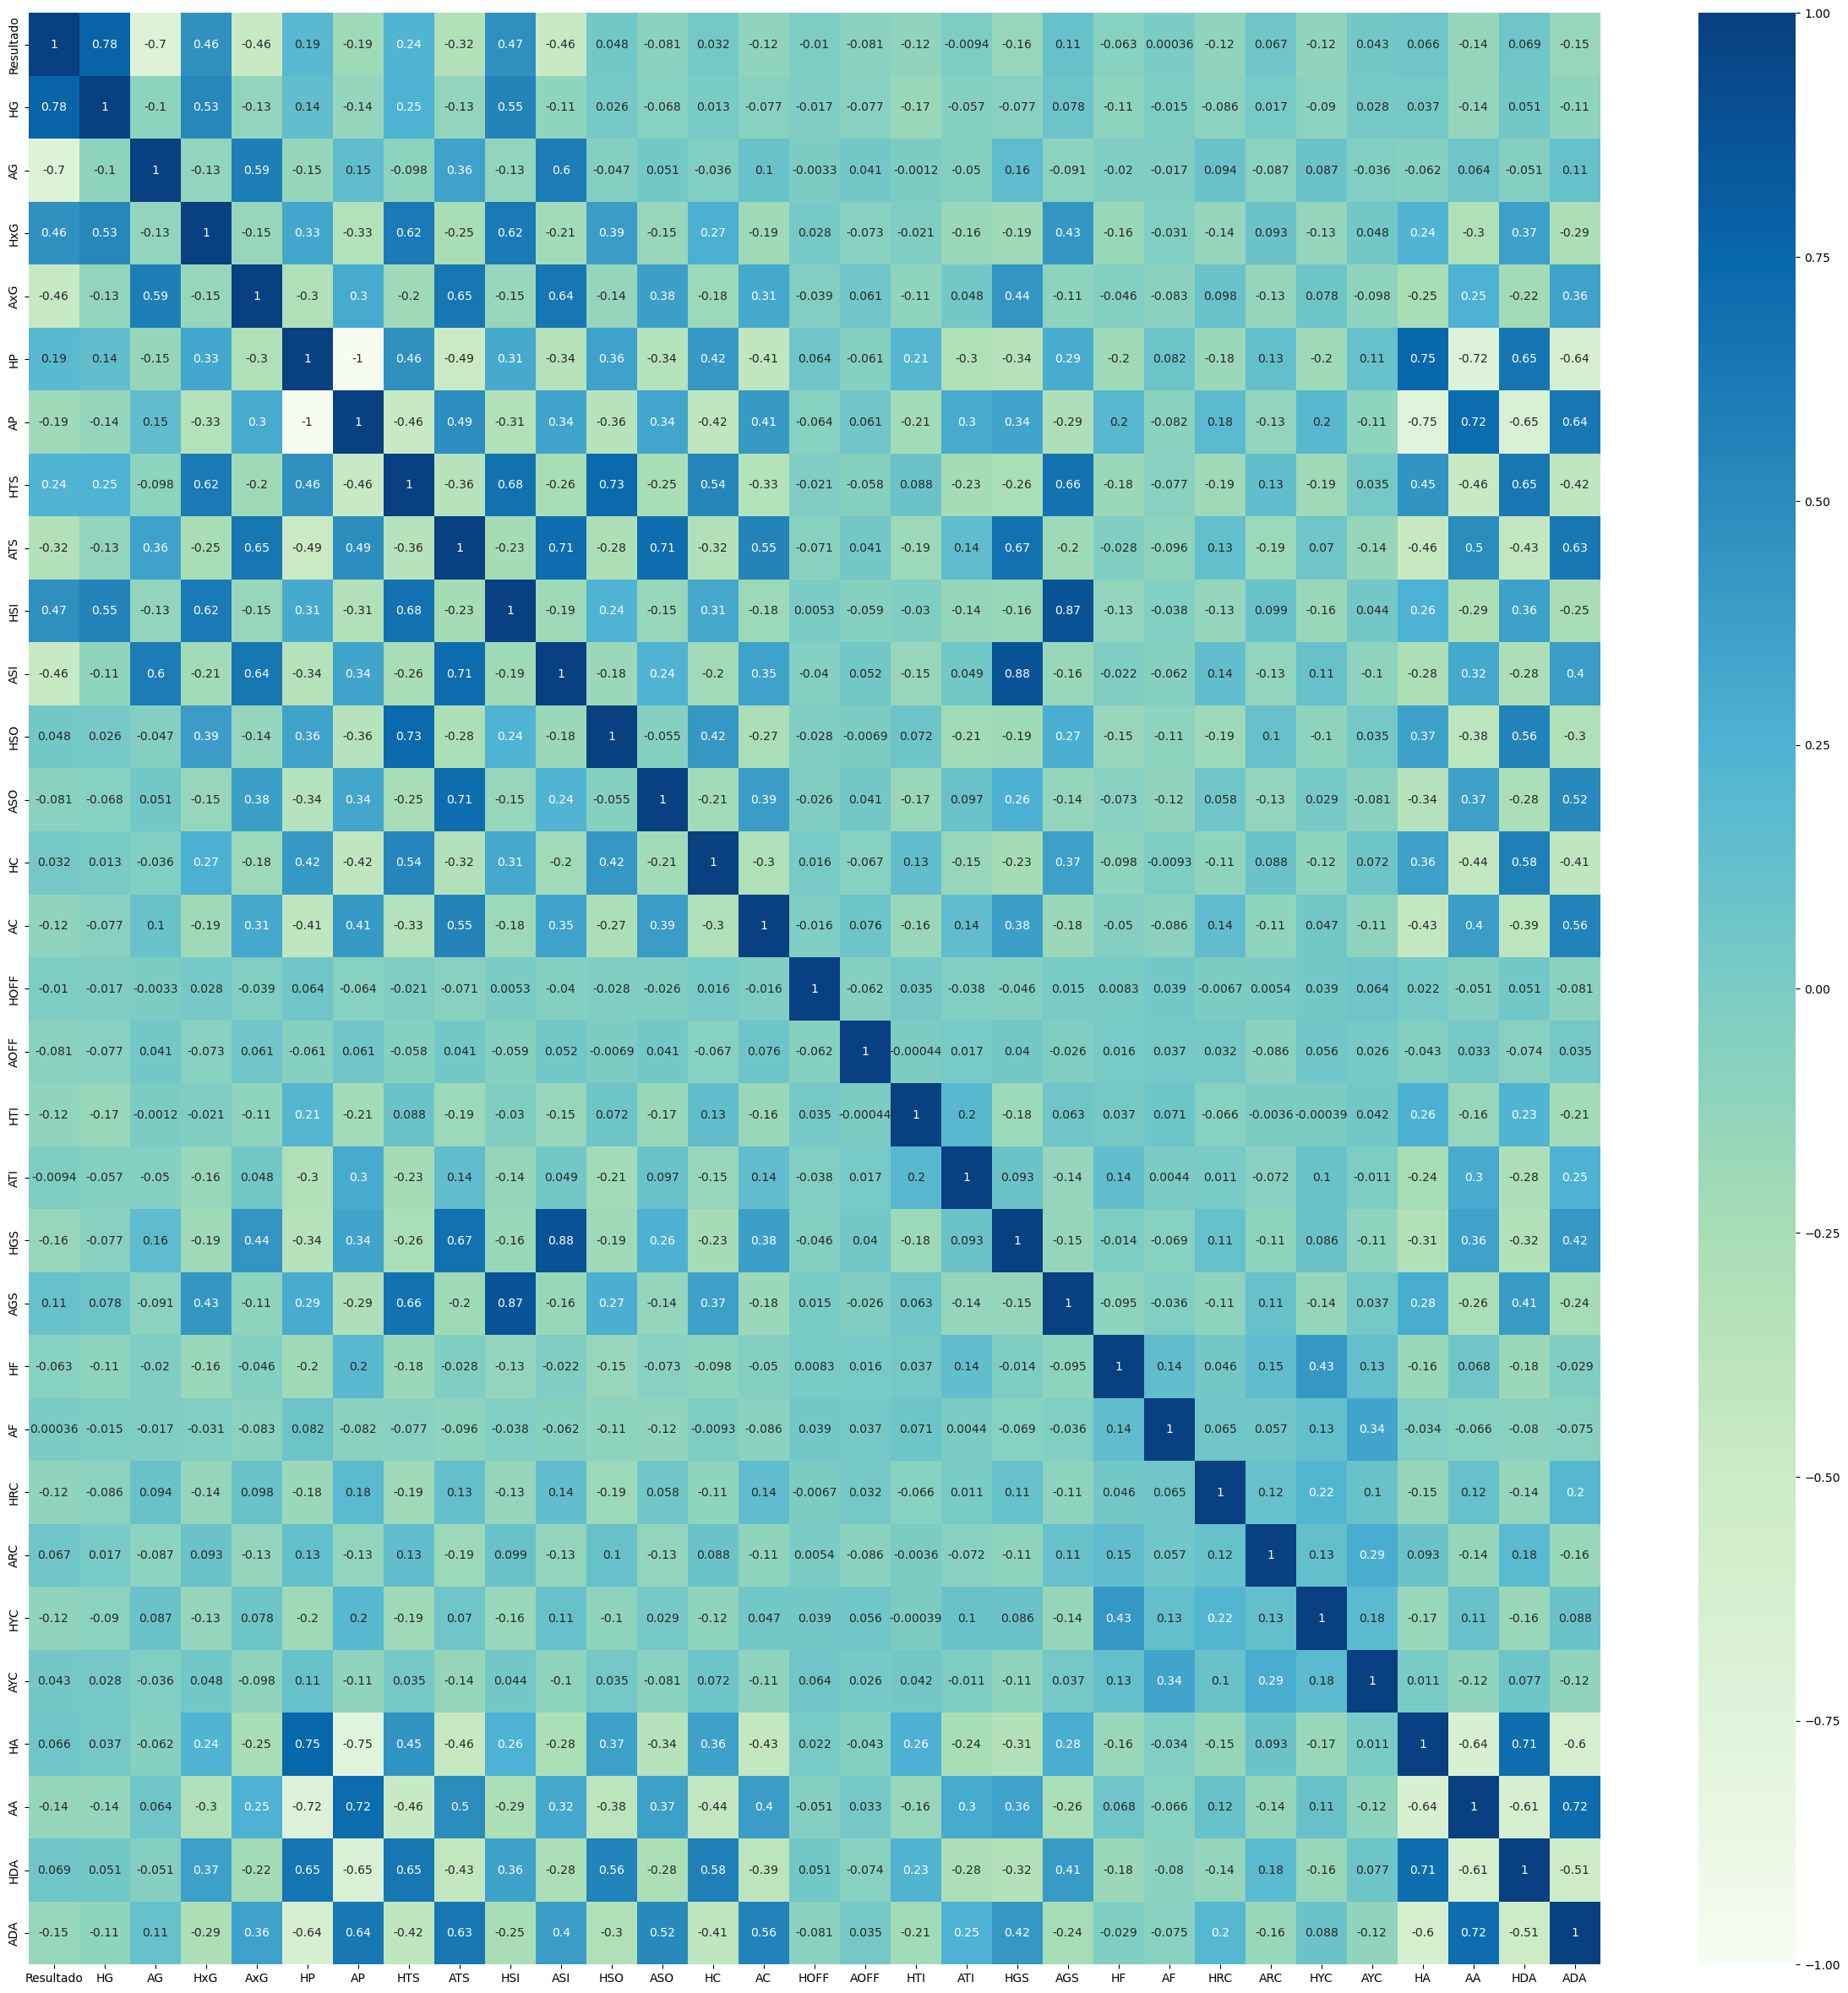

In [25]:
# Se revisa si la variable objetivo está correlacionada con otra variable
plt.figure(figsize =(30,30))
correlacion = df_data.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs

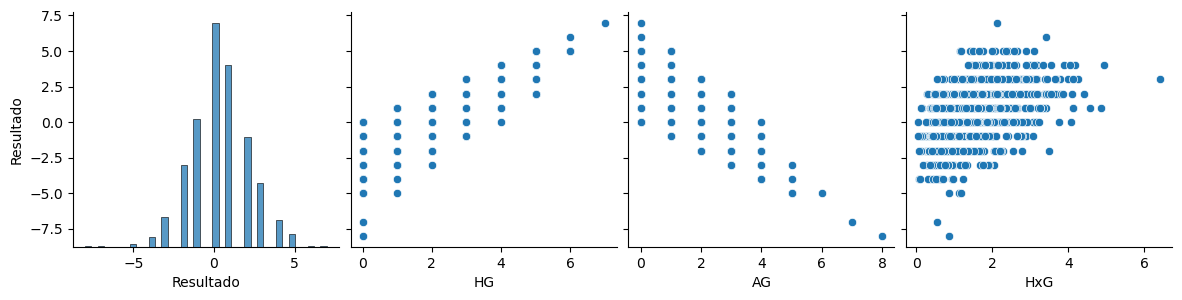

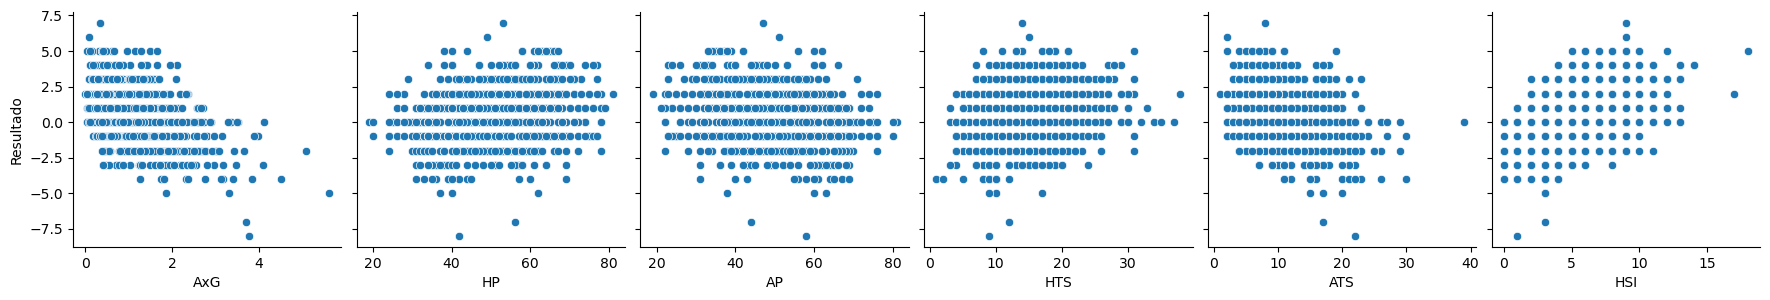

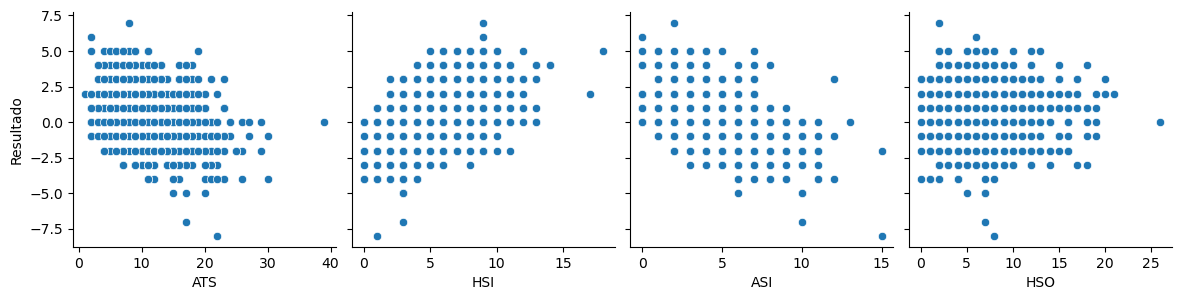

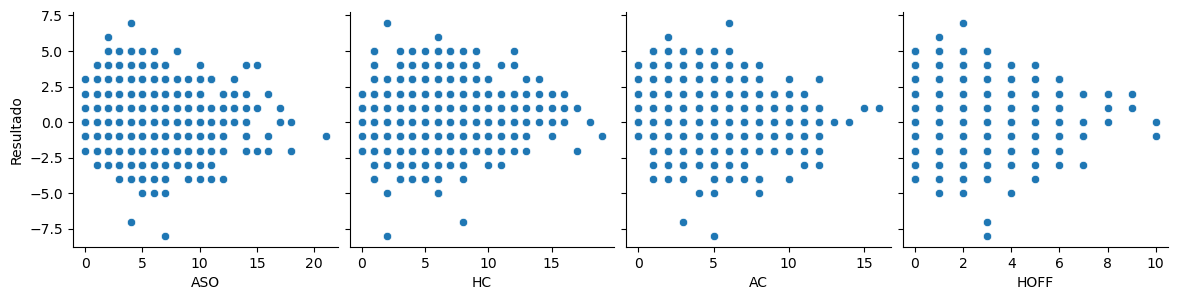

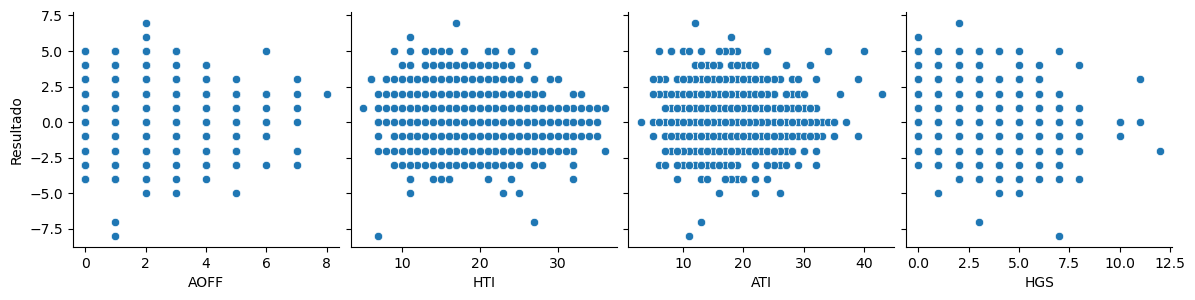

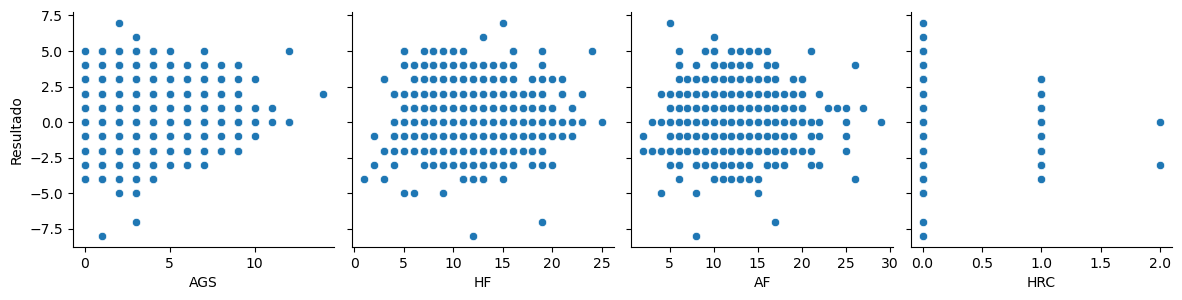

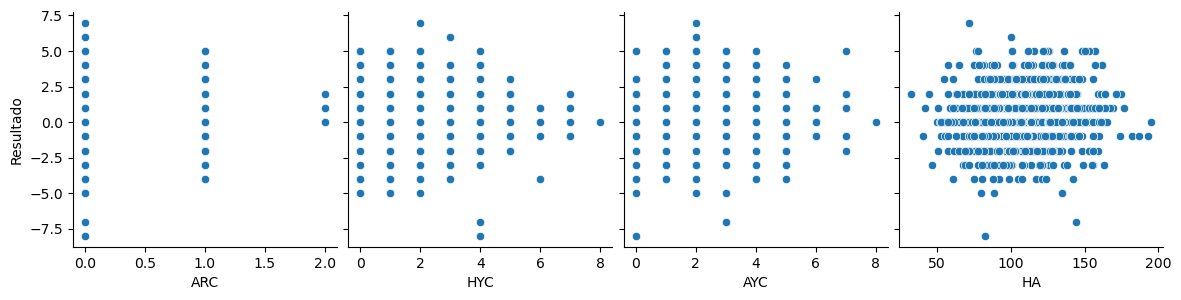

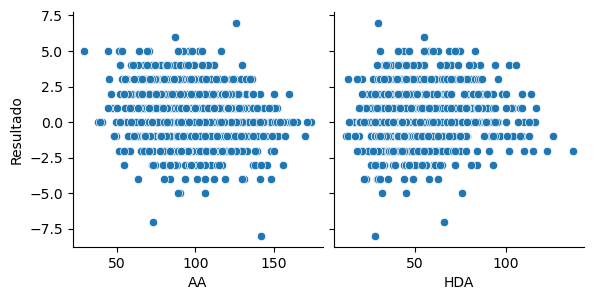

In [26]:
# Se diagrama la relación entre cada variable explicativa y la variable objetivo
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[0:4], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[4:10], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[8:12], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[12:16], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[16:20], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[20:24], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[24:28], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[28:30], kind='scatter')

### 4. Modelamiento

In [27]:
columns_to_drop = ['HG', 'AG', 'HTS', 'ATS', 'AP']
df_data = df_data.drop(columns=columns_to_drop)

#### Pipeline 1: Modelo con eliminación de valores atípicos en la variable objetivo y estandarización

In [28]:
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
final_columns = df_data.columns.tolist()
final_columns.remove('Resultado')

# Se declara el modelo
model = [('model', LinearRegression())]

pre = [('scaler', StandardScaler())]

# Se declara el pipeline
pipeline1 = Pipeline(pre+model)

In [29]:
# Se extraen las variables explicativas y objetivo para entrenar
df_datap1 = df_data

X = df_datap1.drop('Resultado', axis = 1)
Y = df_datap1['Resultado']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline1 = pipeline1.fit(X_train,Y_train)

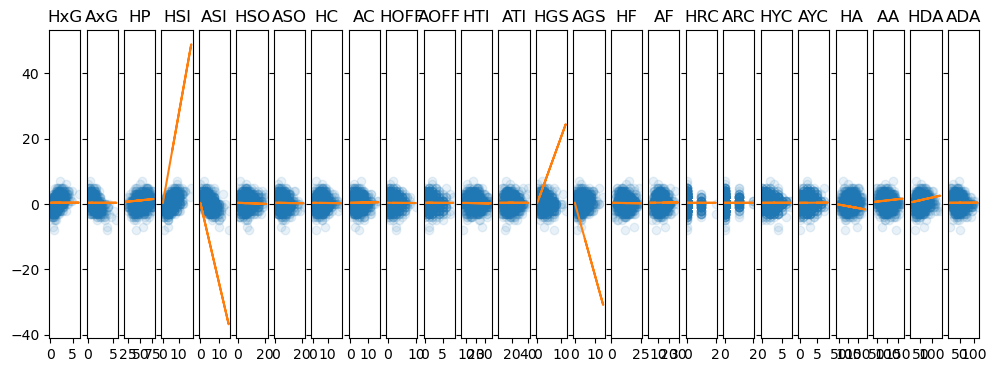

In [30]:
# Se visualiza la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(final_columns), sharey=True, figsize = (12,4))

for i in range(len(final_columns)):
    pos_col = i
    col = final_columns[pos_col]

    # Variable x
    x = X_train[col]
    # Pendiente
    m = pipeline1['model'].coef_[pos_col]
    # Interceto
    b = pipeline1['model'].intercept_

    axs[i].plot(x, Y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [31]:
# Vale la pena hacer estandarización de los datos para tener coeficientes más comparables en misma escala.
importancia = pipeline1['model'].coef_
pd.options.display.float_format = '{:.5f}'.format
importancia_atributo = pd.DataFrame(data={"Atributo": final_columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,HSI,2.69444
1,HGS,2.00480
2,HDA,0.01594
3,HP,0.01498
4,AC,0.00991
5,HxG,0.00902
6,AA,0.00728
7,AYC,0.00668
8,AF,0.00373
9,AxG,0.00286


In [32]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline1.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #1 - Datos de entrenamiento
RMSE: 0.15
R²: 0.99


In [33]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline1.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #1 - Datos de test
RMSE: 0.16
R²: 0.99


<Axes: >

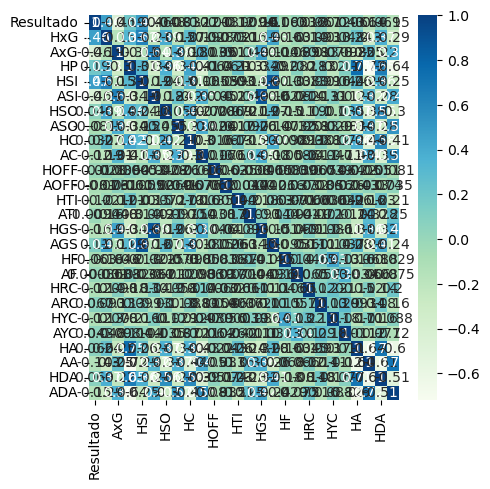

In [34]:
# Se revisa la colinealidad
df_temp = df_datap1[final_columns]
plt.figure(figsize =(5,5))
correlacion = df_datap1.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


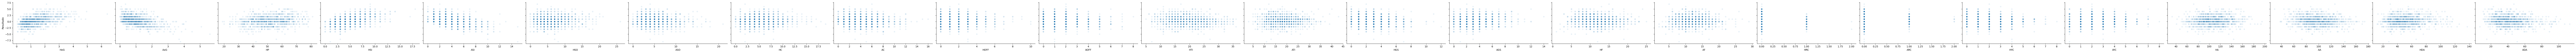

In [35]:
# Linealidad
#Se ven datos relativamente juntos, sin embargo, hay una pequeña cantidad de datos fuera de esta cohesión en las tres variables.
sns.pairplot(df_datap1, height=3, aspect = 2, y_vars = 'Resultado', x_vars = final_columns, kind='scatter', plot_kws = {'alpha':0.1})

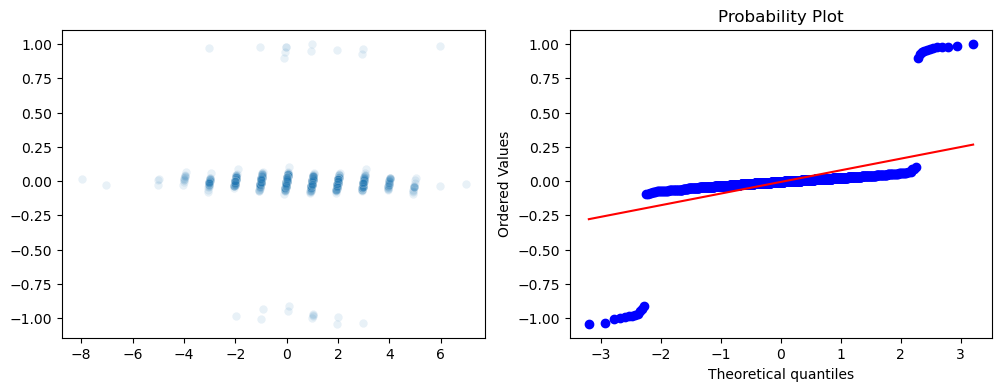

In [36]:
# Nos sirve para revisar si los errores vienen con una distribución teoríca. En este caso, de una distribución normal.
X = df_data.drop('Resultado', axis = 1)
y = df_data['Resultado']

# Calculamos los errores
errors = (pipeline1.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline1.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

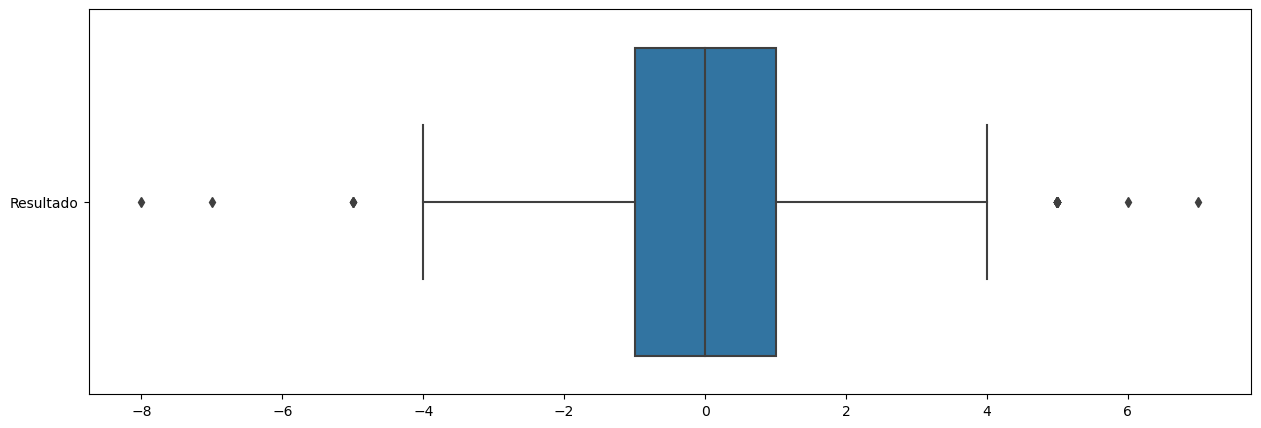

In [37]:
# Diagrama de caja
# Acá podemos ver los valores atípicos de Life expectancy.
# En este caso están los menores a 44.5.
fig=plt.figure(figsize=(15,5))
ax = sns.boxplot(data= df_datap1[['Resultado']], orient="h")

### 5. Evaluación cuantitativa

In [38]:
# Se ajusta el modelo para ver el reporte de estadísticas
model = sm.OLS(Y, X).fit()
# Se muestran las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Resultado   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              6183.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):                        0.00
Time:                        15:37:02   Log-Likelihood:                          491.32
No. Observations:                1031   AIC:                                     -932.6
Df Residuals:                    1006   BIC:                                     -809.2
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HxG            0.0079      0.008      0.994      0.320      -0.008       0.023
AxG            0.0036      0.009      0.376      0.707      -0.015       0.022
HP             0.0014      0.001      2.034      0.042    4.83e-05       0.003
HSI            0.9932      0.005    216.265      0.000       0.984       1.002
ASI           -1.0025      0.005   -184.508      0.000      -1.013      -0.992
HSO           -0.0033      0.002     -2.033      0.042      -0.007      -0.000
ASO           -0.0012      0.002     -0.652      0.515      -0.005       0.002
HC            -0.0002      0.002     -0.080      0.936      -0.004       0.004
AC             0.0008      0.002      0.355      0.723      -0.004       0.005
HOFF          -0.0044      0.003     -1.517      0.130      -0.010       0.001
AOFF          -0.0023      0.003     -0.724      0.469      -0.009       0.004
HTI           -0.0007      0.001     -0.737      0.461      -0.002       0.001
ATI           -0.0007      0.001     -0.760      0.448      -0.002       0.001
HGS            1.0087      0.006    171.153      0.000       0.997       1.020
AGS           -0.9979      0.005   -201.950      0.000      -1.008      -0.988
HF            -0.0016      0.001     -1.177      0.240      -0.004       0.001
AF             0.0017      0.001      1.312      0.190      -0.001       0.004
HRC           -0.0154      0.017     -0.912      0.362      -0.048       0.018
ARC            0.0103      0.015      0.682      0.495      -0.019       0.040
HYC            0.0006      0.004      0.158      0.875      -0.007       0.008
AYC            0.0024      0.004      0.664      0.507      -0.005       0.010
HA            -0.0006      0.000     -1.843      0.066      -0.001    3.86e-05
AA             0.0001      0.000      0.496      0.620      -0.000       0.001
HDA            0.0005      0.000      1.158      0.247      -0.000       0.001
ADA         8.092e-05      0.001      0.160      0.873      -0.001       0.001
==============================================================================
Omnibus:                      337.654   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60489.564
Skew:                          -0.083   Prob(JB):                         0.00
Kurtosis:                      40.524   Cond. No.                         628.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Se guarda el pipeline en el archivo
filename = 'modelo.joblib' # Ubicación del archivo a entregar
dump(pipeline1, filename)

['modelo.joblib']

In [40]:
# Proceso de prueba del cliente
df_recent_full = pd.read_csv(f"../data/2023-24/version{version}/proximos/{pais}_{liga}_23-24.csv", sep=',', encoding = 'utf-8', na_values = '-') # Lectura de los datos recientes
df_recent = df_recent_full[final_columns]
# Se lee el archivo y carga el modelo
pipeline = load(filename)

y_predicted = pipeline.predict(df_recent)

In [41]:
for i in y_predicted[:29]:
    print ("{:.2f}".format(i).replace('.', ','))

0,07
0,98
1,11
0,07
0,09
1,75
-0,62
1,29
0,95
-0,82
0,87
-0,41
-1,82
1,19
0,59
0,96
1,48
0,51
-0,71
-1,62
2,05
1,40
-0,42
-0,73
2,49
-1,10
0,39
0,67
0,58


In [42]:
for i in range(len(y_predicted[:29])):
    home_team = df_recent_full.iloc[i]["HomeTeam"]
    away_team = df_recent_full.iloc[i]["AwayTeam"]
    
    print(home_team + " vs " + away_team)
    print(y_predicted[i])
    ganador = home_team if y_predicted[i] >= 0.75 else (away_team if y_predicted[i] <= -0.75 else "ninguno")
    if ganador == "ninguno":
            print("No hay ganador claro. " + str(abs(y_predicted[i]))[:4])
    else:
        print("Gana " + ganador + " por " + str(abs(y_predicted[i]))[:4] + " goles")
    print()

Gent vs KV Mechelen
0.07072207416604204
No hay ganador claro. 0.07

Genk vs Círculo Brujas
0.9788478911203138
Gana Genk por 0.97 goles

St. Lieja vs Kortrijk
1.1069029545393132
Gana St. Lieja por 1.10 goles

Club Brujas vs Westerlo
0.07114324177804232
No hay ganador claro. 0.07

Antwerp vs Charleroi
0.09177202479972107
No hay ganador claro. 0.09

Royale Union SG vs St. Truiden
1.746385907374658
Gana Royale Union SG por 1.74 goles

Leuven vs Anderlecht
-0.6176904603315858
No hay ganador claro. 0.61

RWDM vs Eupen
1.2943324659401922
Gana RWDM por 1.29 goles

Círculo Brujas vs St. Lieja
0.9454240552874347
Gana Círculo Brujas por 0.94 goles

Kortrijk vs Leuven
-0.8184553082883874
Gana Leuven por 0.81 goles

Gent vs Westerlo
0.8730624045437336
Gana Gent por 0.87 goles

Charleroi vs Club Brujas
-0.40918980534125465
No hay ganador claro. 0.40

St. Truiden vs Genk
-1.8243687730974563
Gana Genk por 1.82 goles

Eupen vs Antwerp
1.1941093269642555
Gana Eupen por 1.19 goles

Anderlecht vs Royale U